<a href="https://colab.research.google.com/github/darp-cs/Amber-Detector/blob/main/A_car_make_model_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings
warnings.filterwarnings('ignore')

from pylab import *

import numpy as np
import time
from pathlib import Path
from IPython.display import Markdown, display


pytorch version:  1.7.0+cu101
fastai version:  1.0.61


In [ ]:
def printmd(string):
    display(Markdown(string))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data

/content/drive/.shortcut-targets-by-id/1BmoaYT7lre2r5Ou5yu40qlGvPQEAhmZF/data


In [ ]:
img_dir = 'car_data'
path = Path(img_dir)

In [ ]:
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 224,bs = 64).normalize(imagenet_stats)

In [ ]:
CAR_CLASSES = data.classes

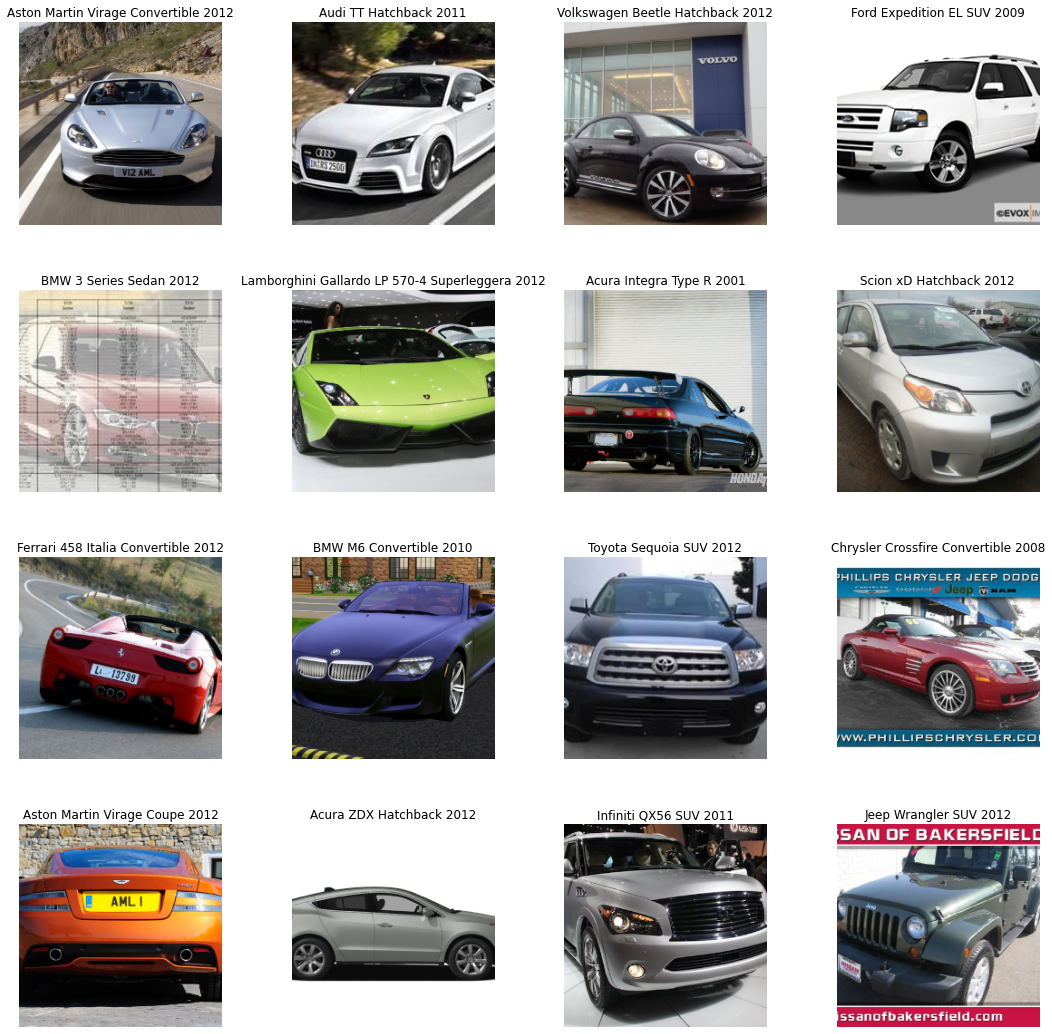

In [ ]:
data.show_batch(rows = 4,figsize = (15,15))

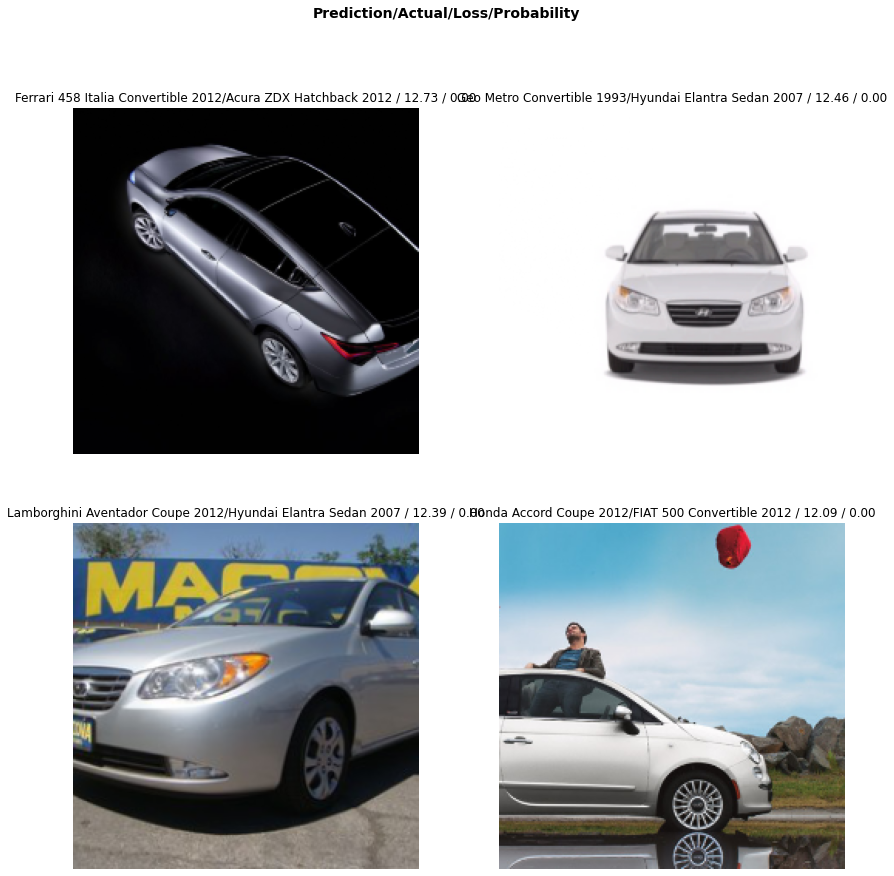

In [ ]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

# Predict

In [ ]:
model_path = "car_data"
image_path = "car_data/car_data/prediction"
pred_img_file = "car_data/car_data/prediction/ford-f150.jpg"

In [ ]:
M = load_learner(path=model_path, file='first_model.pkl')

In [ ]:
im_pred=open_image(pred_img_file)

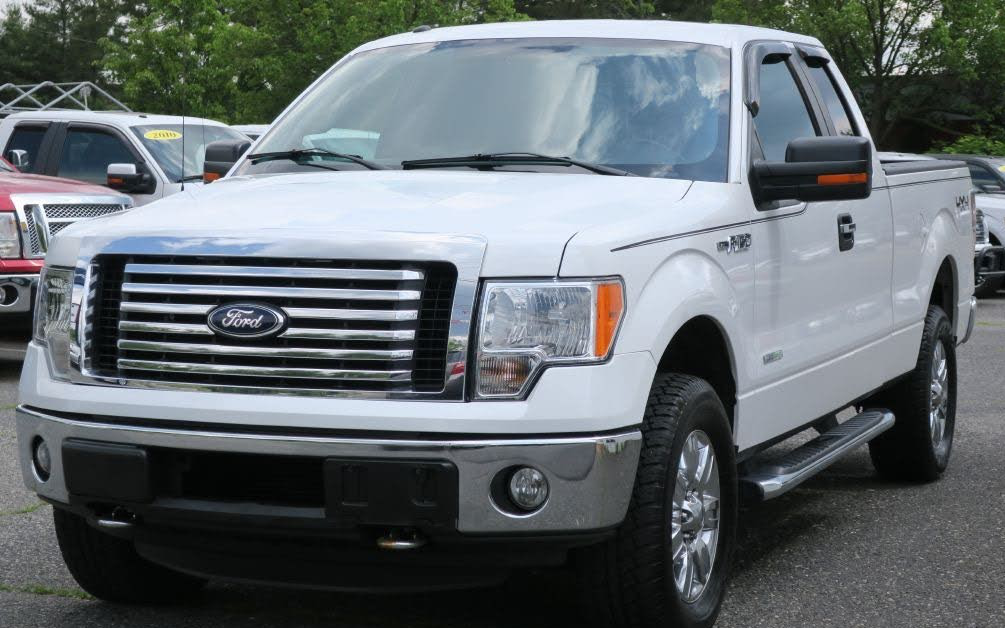

In [ ]:
im_pred

In [ ]:
pred = M.predict(im_pred)

### Predicted Car model

In [ ]:
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

<br>

###Predicted Car: 

'Ford Expedition EL SUV 2009'

## Car color

In [ ]:
!pip install --quiet colorthief
!pip install --quiet webcolors==1.3

In [ ]:
import webcolors
from colorthief import ColorThief

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        color_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        color_name = closest_colour(requested_colour)
    return color_name


In [ ]:
color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])
#print("CAR COLOR: ", color_name) #, x,y,w,h))

display(Markdown("###CAR Color: "), color_name)

###CAR Color: 

'gainsboro'

## Experiment with other images

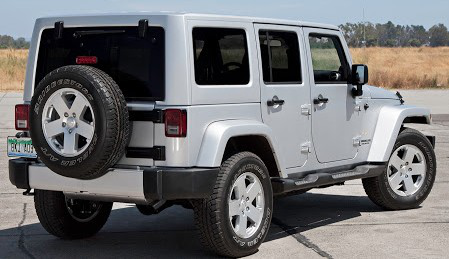

In [ ]:
pred_img_file = "car_data/car_data/prediction/jeep2.jpg"
im_pred=open_image(pred_img_file)
im_pred

In [ ]:
pred = M.predict(im_pred)
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])

display(Markdown("###CAR Color: "), color_name)

<br>

###Predicted Car: 

'Jeep Wrangler SUV 2012'

###CAR Color: 

'silver'

## Another

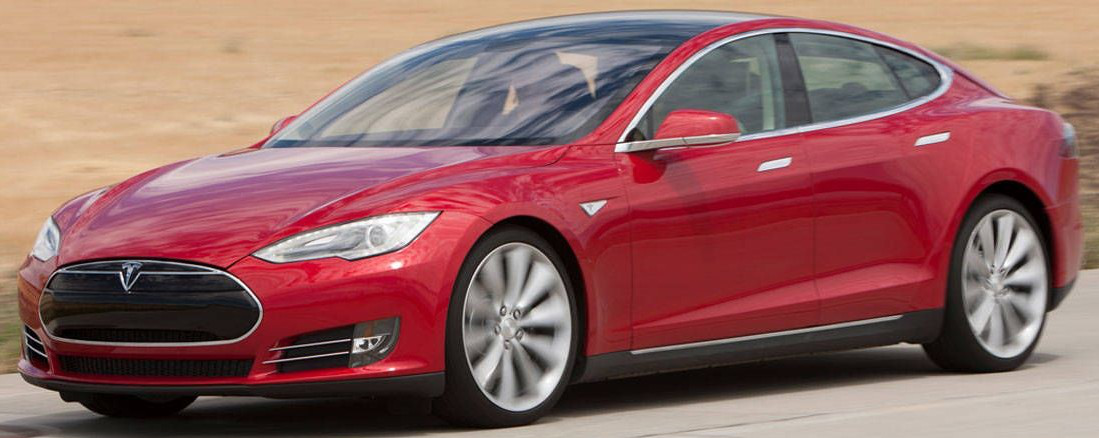

In [ ]:
pred_img_file = "car_data/car_data/prediction/tesla-s.jpg"
im_pred=open_image(pred_img_file)
im_pred

In [ ]:

pred = M.predict(im_pred)
#display(Markdown("###Actual Car: "), )
display(Markdown("<br>"))
display(Markdown("###Predicted Car: "), CAR_CLASSES[pred[1].cpu().numpy()])

color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])

display(Markdown("###CAR Color: "), color_name)

<br>

###Predicted Car: 

'Tesla Model S Sedan 2012'

###CAR Color: 

'rosybrown'